# Create Basic Training and Testing Data Sets

In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv('GP Prescribing - July 2017 (csv).csv', encoding = "ISO-8859-1")

In [3]:
test = pd.read_csv('GP Prescribing - August 2017 (csv).csv', encoding = "ISO-8859-1")

In [4]:
train.shape

(474539, 19)

In [5]:
test.shape

(474571, 19)

In [6]:
train.columns

Index(['PRACTICE', 'Year', 'Month', 'VTM_NM', 'VMP_NM', 'AMP_NM',
       'Presentation', 'Strength', 'Total Items', 'Total Quantity',
       'Gross Cost (£)', 'Actual Cost (£)', 'BNF Code', 'BNF Chapter',
       'BNF Section', 'BNF Paragraph', 'BNF Sub-Paragraph', 'Unnamed: 17',
       'Unnamed: 18'],
      dtype='object')

In [7]:
# Check that there are not columns missing between the two. 
[i for i in train.columns if i not in test.columns]

[]

In [8]:
train = train.drop(['Gross Cost (£)', 'Unnamed: 17','Unnamed: 18'], 1)

In [9]:
test = test.drop(['Actual Cost (£)', 'Gross Cost (£)', 'Unnamed: 17','Unnamed: 18'], 1)

In [10]:
train.shape

(474539, 16)

In [11]:
test.shape

(474571, 15)

In [12]:
train = train.dropna(axis=0)

In [13]:
test = test.dropna(axis=0)

In [14]:
#I changed the name to loss so thats it compatible with the other repo.
train['loss'] = train['Actual Cost (£)']

In [15]:
train = train.drop('Actual Cost (£)', 1)

In [16]:
train_id = list(range(len(train)))

In [17]:
train['id'] = train_id

In [18]:
test['id'] = list(range(len(test)))

In [19]:
train.to_csv('/home/mark/Documents/Kaggle_Projects/Allstate-Data-Hack-2017/input/train.csv', index=False)

In [20]:
test.to_csv('/home/mark/Documents/Kaggle_Projects/Allstate-Data-Hack-2017/input/test.csv', index=False)

In [21]:
num_columns = train.describe().columns

In [22]:
num_columns

Index(['PRACTICE', 'Year', 'Month', 'Total Items', 'Total Quantity',
       'BNF Chapter', 'BNF Section', 'BNF Paragraph', 'BNF Sub-Paragraph',
       'loss', 'id'],
      dtype='object')

In [23]:
cat_columns = [col for col in test.columns if col not in num_columns]

In [24]:
cat_columns

['VTM_NM', 'VMP_NM', 'AMP_NM', 'Presentation', 'Strength', 'BNF Code']

# Basic EDA

In [25]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from collections import Counter
import scipy
import seaborn as sns
import math
import re
color = sns.color_palette()

In [26]:
#Basic correlation with actual cost variable
train.corr()['loss']

PRACTICE            -0.002150
Year                      NaN
Month                     NaN
Total Items          0.254202
Total Quantity       0.197554
BNF Chapter         -0.062665
BNF Section          0.015666
BNF Paragraph       -0.015755
BNF Sub-Paragraph    0.009107
loss                 1.000000
id                  -0.002784
Name: loss, dtype: float64

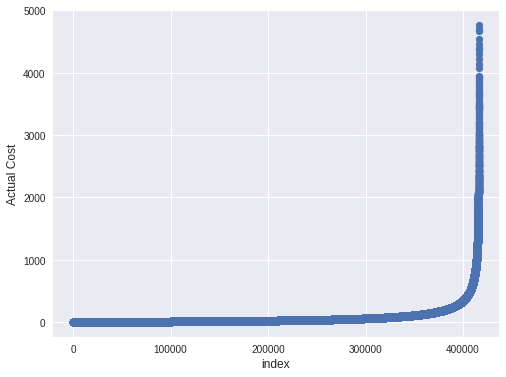

In [27]:
plt.figure(figsize=(8,6))
plt.scatter(range(train.shape[0]), np.sort(train.loss.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('Actual Cost', fontsize=12)
plt.show()

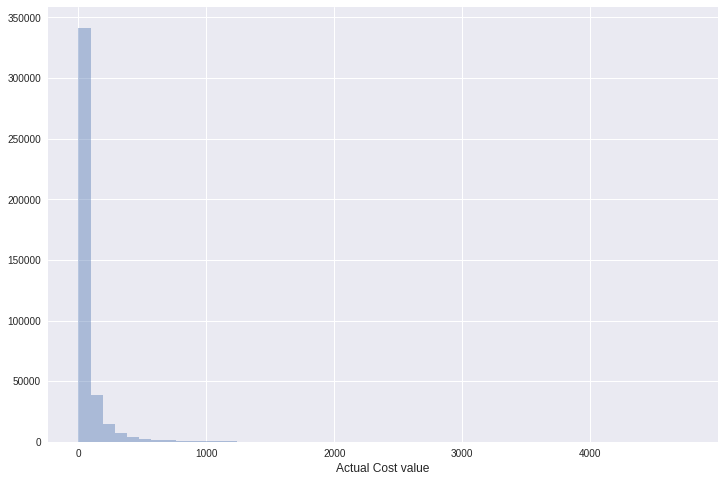

In [28]:
# ulimit = 2500
# train['loss'].ix[train['loss']>ulimit] = ulimit

plt.figure(figsize=(12,8))
sns.distplot(train.loss.values, bins=50, kde=False)
plt.xlabel('Actual Cost value', fontsize=12)
plt.show()

In [29]:
# Clearly Not Normal. 

In [30]:
train_log_cost = [math.log(i) for i in train.loss.values]

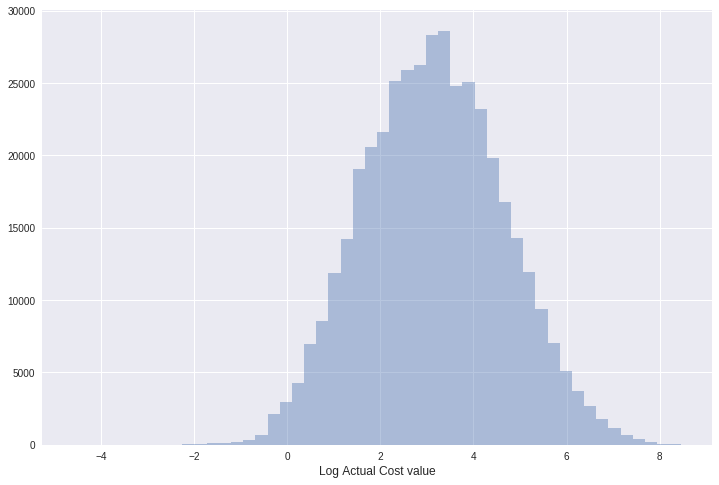

In [31]:
plt.figure(figsize=(12,8))
sns.distplot(train_log_cost, bins=50, kde=False)
plt.xlabel('Log Actual Cost value', fontsize=12)
plt.show()

In [32]:
#Alot better! Means a log transoformation is required beforehand. 

In [33]:
train['Log Actual Cost'] = train_log_cost

In [34]:
train.corr()['Log Actual Cost']

PRACTICE            -0.002233
Year                      NaN
Month                     NaN
Total Items          0.298288
Total Quantity       0.239222
BNF Chapter         -0.064104
BNF Section          0.063909
BNF Paragraph       -0.015750
BNF Sub-Paragraph   -0.007948
loss                 0.630550
id                  -0.003816
Log Actual Cost      1.000000
Name: Log Actual Cost, dtype: float64

In [35]:
train_log_cost_norm = normalize(np.array(train_log_cost).reshape(1, -1))

In [36]:
train['Log Actual Cost Norm'] = np.array(train_log_cost).reshape(-1, 1)

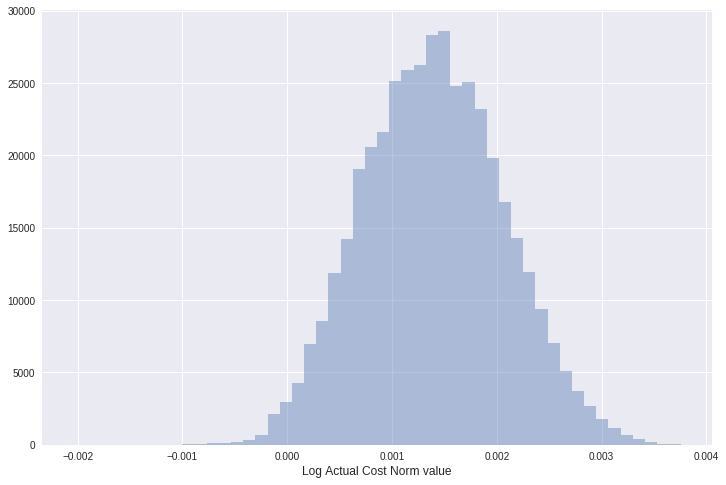

In [37]:
plt.figure(figsize=(12,8))
sns.distplot(train_log_cost_norm, bins=50, kde=False)
plt.xlabel('Log Actual Cost Norm value', fontsize=12)
plt.show()

In [38]:
train.corr()['Log Actual Cost Norm']

PRACTICE               -0.002233
Year                         NaN
Month                        NaN
Total Items             0.298288
Total Quantity          0.239222
BNF Chapter            -0.064104
BNF Section             0.063909
BNF Paragraph          -0.015750
BNF Sub-Paragraph      -0.007948
loss                    0.630550
id                     -0.003816
Log Actual Cost         1.000000
Log Actual Cost Norm    1.000000
Name: Log Actual Cost Norm, dtype: float64

In [52]:
def cat_lens(train, cat_columns):
    for col in cat_columns:
        train[col + ' Length'] = [len(i) for i in train[col]]

In [53]:
cat_lens(train, cat_columns)

In [54]:
cat_lens(test, cat_columns)

In [40]:
train.corr()['Log Actual Cost']

PRACTICE               -0.002233
Year                         NaN
Month                        NaN
Total Items             0.298288
Total Quantity          0.239222
BNF Chapter            -0.064104
BNF Section             0.063909
BNF Paragraph          -0.015750
BNF Sub-Paragraph      -0.007948
loss                    0.630550
id                     -0.003816
Log Actual Cost         1.000000
Log Actual Cost Norm    1.000000
VTM_NM Length          -0.009830
VMP_NM Length           0.132685
AMP_NM Length           0.127833
Presentation Length     0.171132
Strength Length         0.158293
BNF Code Length        -0.012739
Name: Log Actual Cost, dtype: float64

# Determine Unique Units

In [42]:
def unique_units(train):
    Strength_per_units = [i.replace(' ', '') if '/' in i else None for i in train['Strength']]
    Strength_per_units = [i.split('/') for i in Strength_per_units if i is not None]
    
    for i, unit_list in enumerate(Strength_per_units):
        if len(unit_list) == 4:
            new_units = []
            new_units.append('/'.join(unit_list[:2]))
            new_units.append('/'.join(unit_list[2:]))
            Strength_per_units[i] = new_units
        
    Strength_per_units = [i for sublist in Strength_per_units for i in sublist]
    Strength_per_units = [i.lstrip('0123456789.- ') for i in Strength_per_units]
    
    Strength_per_units_count = Counter(Strength_per_units).most_common()
    
    unique_units = [Strength_per_units_count[i][0] for i in range(20)]
    
    if '' in unique_units:
        del unique_units[unique_units.index('')]
    
    unique_units = list(set([i.lower() for i in unique_units]))
    
    return unique_units

In [43]:
unique_units = unique_units(train)

In [ ]:
# Strength_per_units = [i.replace(' ', '') if '/' in i else None for i in train['Strength']]
# Strength_per_units = [i.split('/') for i in Strength_per_units if i is not None]

In [ ]:
# for i, unit_list in enumerate(Strength_per_units):
#     if len(unit_list) == 4:
#         new_units = []
#         new_units.append('/'.join(unit_list[:2]))
#         new_units.append('/'.join(unit_list[2:]))
#         Strength_per_units[i] = new_units

In [ ]:
# Strength_per_units = [i for sublist in Strength_per_units for i in sublist]

In [ ]:
# Strength_per_units = [i.lstrip('0123456789.- ') for i in Strength_per_units]

In [ ]:
# Strength_per_units_count = Counter(Strength_per_units).most_common()

In [ ]:
# unique_units = [Strength_per_units_count[i][0] for i in range(20)]

In [ ]:
# del unique_units[unique_units.index('')]

In [ ]:
# unique_units = list(set([i.lower() for i in unique_units]))

In [ ]:
# unique_units 

# Determine Measurements 

In [49]:
def measurements_parser(unique_units, train_Strength, prefix_str = ''):
    first_value_dict = {}
    for unit in unique_units:
        first_value_dict[prefix_str + unit] = []
    first_value_dict[prefix_str + 'Unknown Units'] = []
    for i, strength_list in enumerate(train_Strength):
        strength = strength_list[0].lower()
        if len(strength_list) > 2:
            first_value_dict[prefix_str + 'Unknown Units'].append(1)
            for unit in unique_units:
                first_value_dict[prefix_str + unit].append(0)
        else:
            units_checker = [unit for unit in unique_units if unit in strength]
            if len(units_checker) >= 1:
                longest_unit_found = max(units_checker, key=len)
                other_units = [unit for unit in unique_units if unit is not longest_unit_found]
                search_for_mult = re.compile('[0-9]*x[0-9]*').search(strength)
                if bool(search_for_mult) is True:
                    if len(search_for_mult.group().split('x')) == 2:
                        if any(num is '' for num in search_for_mult.group().split('x')):
                            first_value_dict[prefix_str + longest_unit_found].append(0)
                        else:
                            first_value_dict[prefix_str + longest_unit_found].append(np.product([float(i) for i in search_for_mult.group().split('x')]))
                    else:
                        first_value_dict[prefix_str + longest_unit_found].append(0)
                elif bool(re.compile('[A-Za-z,%,|-]').search(strength[:strength.index(longest_unit_found)])) is True:
                    first_value_dict[prefix_str + longest_unit_found].append(0)
                else:
                    first_value_dict[prefix_str + longest_unit_found].append(strength[:strength.index(longest_unit_found)])
                for unit in other_units:
                    first_value_dict[prefix_str + unit].append(0)
            else:
                for unit in unique_units:
                    first_value_dict[prefix_str + unit].append(0)
            if all(unit not in strength for unit in unique_units):
                first_value_dict[prefix_str + 'Unknown Units'].append(1)
            else:
                first_value_dict[prefix_str + 'Unknown Units'].append(0)
    return first_value_dict

In [57]:
def determine_measurements(train, unique_units):
    train_Strength = [i.replace(' ', '') for i in train['Strength']]
    
    train_Strength = [i.split('/') for i in train_Strength]
    
    for i, unit_list in enumerate(train_Strength):
        if len(unit_list) == 4:
            new_units = []
            new_units.append('/'.join(unit_list[:2]))
            new_units.append('/'.join(unit_list[2:]))
            train_Strength[i] = new_units
    
    first_value_dict = measurements_parser(unique_units, train_Strength)
    
    second_value_dict = measurements_parser(unique_units, train_Strength, prefix_str = 'Per ')
    
    for key, value in first_value_dict.items():
        train[key] = value
        
    for key, value in second_value_dict.items():
        train[key] = value
            
    return train

In [58]:
train = determine_measurements(train, unique_units)

In [59]:
test = determine_measurements(test, unique_units)

In [61]:
train.to_csv('/home/mark/Documents/Kaggle_Projects/Allstate-Data-Hack-2017/input/train.csv', index=False)

In [62]:
test.to_csv('/home/mark/Documents/Kaggle_Projects/Allstate-Data-Hack-2017/input/test.csv', index=False)

In [ ]:
# train_Strength = [i.replace(' ', '') for i in train['Strength']]

In [ ]:
# train_Strength = [i.split('/') for i in train_Strength]

In [ ]:
# for i, unit_list in enumerate(train_Strength):
#     if len(unit_list) == 4:
#         new_units = []
#         new_units.append('/'.join(unit_list[:2]))
#         new_units.append('/'.join(unit_list[2:]))
#         train_Strength[i] = new_units

In [ ]:
# first_value_dict = {}
# for unit in unique_units:
#     first_value_dict[unit] = []
# first_value_dict['Unknown Units'] = []
# for i, strength_list in enumerate(train_Strength):
#     strength = strength_list[0].lower()
#     if len(strength_list) > 2:
#         first_value_dict['Unknown Units'].append(1)
#         for unit in unique_units:
#             first_value_dict[unit].append(0)
#     else:
#         units_checker = [unit for unit in unique_units if unit in strength]
#         if len(units_checker) >= 1:
#             longest_unit_found = max(units_checker, key=len)
#             other_units = [unit for unit in unique_units if unit is not longest_unit_found]
#             search_for_mult = re.compile('[0-9]*x[0-9]*').search(strength)
#             if bool(search_for_mult) is True:
#                 if len(search_for_mult.group().split('x')) == 2:
#                     if any(num is '' for num in search_for_mult.group().split('x')):
#                         first_value_dict[longest_unit_found].append(0)
#                     else:
#                         first_value_dict[longest_unit_found].append(np.product([float(i) for i in search_for_mult.group().split('x')]))
#                 else:
#                     first_value_dict[longest_unit_found].append(0)
#             elif bool(re.compile('[A-Za-z,%,|-]').search(strength[:strength.index(longest_unit_found)])) is True:
#                 first_value_dict[longest_unit_found].append(0)
#             else:
#                 first_value_dict[longest_unit_found].append(strength[:strength.index(longest_unit_found)])
#             for unit in other_units:
#                 first_value_dict[unit].append(0)
#         else:
#             for unit in unique_units:
#                 first_value_dict[unit].append(0)
#         if all(unit not in strength for unit in unique_units):
#             first_value_dict['Unknown Units'].append(1)
#         else:
#             first_value_dict['Unknown Units'].append(0)

In [ ]:
# first_value_df = pd.DataFrame(first_value_dict).apply(pd.to_numeric)

In [ ]:
# second_value_dict = {}
# for unit in unique_units:
#     second_value_dict['Per ' + unit] = []
# second_value_dict['Per Unknown Units'] = []
# for i, strength_list in enumerate(train_Strength):
#     if len(strength_list) == 2:
#         strength = strength_list[1].lower()
#         if len(strength_list) > 2:
#             second_value_dict['Per Unknown Units'].append(1)
#             for unit in unique_units:
#                 second_value_dict['Per ' + unit].append(0)
#         else:
#             units_checker = [unit for unit in unique_units if unit in strength]
#             if len(units_checker) >= 1:
#                 longest_unit_found = max(units_checker, key=len)
#                 other_units = [unit for unit in unique_units if unit is not longest_unit_found]
#                 search_for_mult = re.compile('[0-9]*x[0-9]*').search(strength)
#                 if bool(search_for_mult) is True:
#                     if len(search_for_mult.group().split('x')) == 2:
#                         if any(num is '' for num in search_for_mult.group().split('x')):
#                             second_value_dict['Per ' + longest_unit_found].append(0)
#                         else:
#                             second_value_dict['Per ' + longest_unit_found].append(np.product([float(i) for i in search_for_mult.group().split('x')]))
#                     else:
#                         second_value_dict['Per ' + longest_unit_found].append(0)
#                 elif bool(re.compile('[A-Za-z,%,|-]').search(strength[:strength.index(longest_unit_found)])) is True:
#                     second_value_dict['Per ' + longest_unit_found].append(0)
#                 else:
#                     second_value_dict['Per ' + longest_unit_found].append(strength[:strength.index(longest_unit_found)])
#                 for unit in other_units:
#                     second_value_dict['Per ' + unit].append(0)
#             else:
#                 for unit in unique_units:
#                     second_value_dict['Per ' + unit].append(0)
#             if all(unit not in strength for unit in unique_units):
#                 second_value_dict['Per Unknown Units'].append(1)
#             else:
#                 second_value_dict['Per Unknown Units'].append(0)
#     else:
#         second_value_dict['Per Unknown Units'].append(0)
#         for unit in unique_units:
#             second_value_dict['Per ' + unit].append(0)

In [ ]:
# second_value_df = pd.DataFrame(second_value_dict).apply(pd.to_numeric)

In [ ]:
# for key, value in first_value_dict.items():
#     train[key] = value

In [ ]:
# for key, value in second_value_dict.items():
#     train[key] = value

In [ ]:
# train = train.drop([k for k in train.columns if sum(train[k] == 0) == len(train)], 1) 

In [ ]:
perc_list = [j for sublist in [i for i in train_Strength] for j in sublist]

In [ ]:
[i for i in perc_list if '%' in i]

In [ ]:
Counter([i.lstrip('0123456789.- ') for i in Strength_units]).most_common()

In [ ]:
unique_units

In [ ]:
example_strength = ['10mg']

In [ ]:
max([unit for unit in unique_units if unit in example_strength[0]], key=len)

In [ ]:
for example in example_list:
    

In [ ]:
Strength_units = [re.compile(r"[\w']+").findall(i) for i in train['Strength']]

In [ ]:
Strength_units = [[re.sub("\d+", "", i) for  i in Strength_units[j]] for j in range(len(Strength_units))]

In [ ]:
Strength_units = [i for sublist in Strength_units for i in sublist]

In [ ]:
Counter(Strength_units).most_common()

In [ ]:
[i if '/' not in i else None for i in train['Strength']]

In [ ]:
Counter(mg_Strength_list).most_common()

In [ ]:
mg_Strength_list = [i[:i.lower().index('mg')] if 'mg' in i.lower() else None for i in train['Strength']]

In [ ]:
mg_Strength_list = [i.split('/')[-1] if i is not None else '0' for i in mg_Strength_list]

In [ ]:
mg_Strength_list = [i.replace(' ', '') if i is not None else '0' for i in mg_Strength_list]

In [ ]:
mg_Strength_list = [float(i) for i in mg_Strength_list]

In [ ]:
train['mg_Strength_list'] = mg_Strength_list

In [ ]:
train_VTM = [j for sublist in [i.split(' + ') for i in train['VTM_NM']] for j in sublist]

In [ ]:
train_VTM_counter = Counter(train_VTM).most_common()

In [ ]:
train_VTM_counter_keys = [train_VTM_counter[i][0] for i in range(len(train_VTM_counter))]

In [ ]:
train_VTM_counter_keys

In [ ]:
len(train_VTM_counter_keys)

In [ ]:
rgx = re.compile('[A-Za-z]')
train_VTM_counter_keys = [i for i in train_VTM_counter_keys if bool(rgx.search(i)) is True]

In [ ]:
VTM_key_list = []
for vtm in train['VTM_NM']:
    key_present = []
    for key in train_VTM_counter_keys[:100]:
        if key in vtm:
            key_present.append(1)
        else:
            key_present.append(0)
    VTM_key_list.append(key_present)

In [ ]:
pop_VTM_df = pd.DataFrame(VTM_key_list, columns=train_VTM_counter_keys[:100])

In [ ]:
pop_VTM_df.shape

In [ ]:
result = pd.concat([train, pop_VTM_df], axis=1)

In [ ]:
result

In [ ]:
result.describe()

In [ ]:
result.corr()['Log Actual Cost'].sort_values()

In [ ]:
train.head()

In [ ]:
Counter(train['VTM_NM']).most_common()

In [ ]:
sorted(train['VTM_NM'], key=len)[-1]

In [ ]:
VTM_NM_expanded = [i.split(' + ') for i in train['VTM_NM'].values]

In [ ]:
VTM_NM_expanded = [i for sublist in VTM_NM_expanded for i in sublist]

In [ ]:
VTM_NM_unique = list(set(VTM_NM_expanded))

In [ ]:
len(VTM_NM_unique)

In [ ]:
train['VMP_NM'].head(20)

In [ ]:
len(set(train['VMP_NM'].values))

In [ ]:
VPM_NM_expanded = [i.split(' ') for i in train['VMP_NM'].values]

In [ ]:
VPM_NM_expanded = [i for sublist in VPM_NM_expanded for i in sublist]

In [ ]:
VPM_NM_unique = list(set(VPM_NM_expanded))

In [ ]:
len(VPM_NM_expanded)

In [ ]:
VPM_NM_most_common_counter = Counter(VPM_NM_expanded).most_common()

In [ ]:
VPM_NM_most_common_words = [VPM_NM_most_common_counter[i][0] for i in range(len(VPM_NM_most_common_counter))]

In [ ]:
import re

In [ ]:
rgx = re.compile('[0-9]')
VPM_NM_doses = [i for i in VPM_NM_most_common_words if bool(rgx.search(i)) is True]

In [ ]:
train['VMP_NM'][11]

In [ ]:
rgx = re.compile('[^0-9]')
VPM_NM_doses_measements = [re.sub(r'[0-9]+', '', i) for i in VPM_NM_doses]

In [ ]:
Counter(VPM_NM_doses_measements).most_common()

In [ ]:
set_units = ['mg']
mg_dose_list = []
for vmp in train['VMP_NM']:
    mg_amounts = []
    for index in vmp.split('/'):
        for unit in set_units:
            if unit in index:
                mg_amounts.append(float(index[:index.index(unit)].replace('(', '').split(' ')[-1]))
            else:
                mg_amounts.append(0.0)
    mg_dose_list.append(mg_amounts)

In [ ]:
mg_dose_list = [i+(5-len(i))*[0.0] for i in mg_dose_list]

In [ ]:
len(Counter([len(i) for i in mg_dose_list]))

In [ ]:
for i in range(5):
    train['VTM_NM_mg_' + str(i)] = [dose[i] for dose in mg_dose_list]

In [ ]:
Counter([len(i) for i in mg_dose_list])

In [ ]:
[len(i) for i in mg_dose_list].index(3)

In [ ]:
mg_dose_list[1350]

In [ ]:
VTM_NM_expanded = [i.split(' + ') for i in train['VTM_NM']]

In [ ]:
train['VTM_NM_split'] = [len(i) for i in VTM_NM_expanded]

In [ ]:
train.corr()['Log Actual Cost']

In [ ]:
VTM_NM_unique

In [ ]:
Counter(train['VMP_NM']).most_common()

In [ ]:
len(Counter(train['VMP_NM']))